In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt

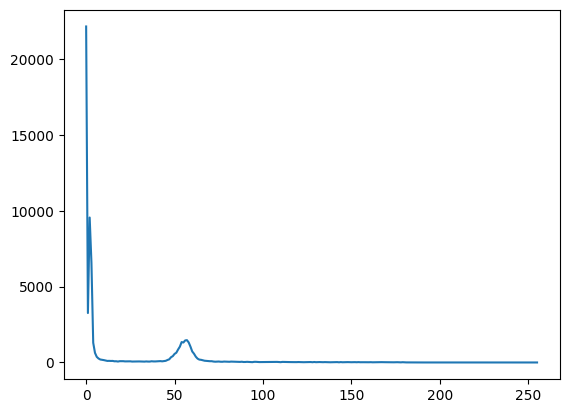

In [9]:
import cv2
import numpy
import matplotlib.pyplot as plt

img = cv2.imread('1.jpg')
resized = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

hist = cv2.calcHist([resized], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()
cv2.imshow('Image Window', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()



In [3]:
# Step 2: Invert the pixel values to get the negative image
negative_image = 255 - img
cv2.imshow('Negative Image', negative_image)
cv2.waitKey(0)
cv2.imwrite('negative_image.jpg', negative_image)
# Step 6: Close the window
cv2.destroyAllWindows()

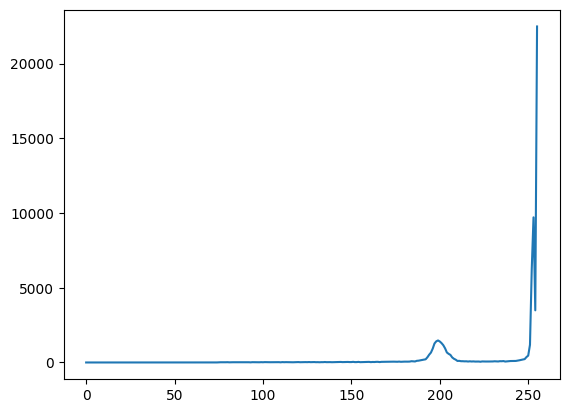

In [5]:
resized = cv2.resize(negative_image, (int(img.shape[1]/2), int(img.shape[0]/2)))

hist_of_the_nagative_image = cv2.calcHist([resized], [0], None, [256], [0, 256])

plt.plot(hist_of_the_nagative_image)
plt.show()

In [9]:
import numpy as np
# Step 2: Convert the image to a floating point representation
image_float = np.float32(img)

# Step 3: Apply the log transformation
c = 255 / np.log(1 + np.max(image_float))  # Calculate the scaling constant
log_image = c * np.log(1 + image_float)

# Step 4: Normalize the transformed image to the 0-255 range
log_image = np.uint8(log_image)

# Step 5: Display the log transformed image
cv2.imshow('Log Transformed Image', log_image)

# Step 6: Wait for a key event
cv2.waitKey(0)  # 0 means wait indefinitely until a key is pressed

# Step 7: Save the log transformed image (if needed)
cv2.imwrite('log_transformed_image.jpg', log_image)  # Uncomment this line to save the log transformed image

# Step 8: Close the window
cv2.destroyAllWindows()

In [12]:
# Step 2: Define the gain (contrast) and bias (brightness)
alpha = 1.5  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)

# Step 3: Apply the linear transformation
transformed_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Step 4: Display the transformed image
cv2.imshow('Linear Transformed Image', transformed_image)

# Step 5: Wait for a key event
cv2.waitKey(0)  # 0 means wait indefinitely until a key is pressed

# Step 6: Save the transformed image (if needed)
cv2.imwrite('linear_transformed_image.jpg', transformed_image)  # Uncomment this line to save the transformed image

# Step 7: Close the window
cv2.destroyAllWindows()

In [38]:
# Step 2: Normalize the image to the range [0, 1]
image_normalized = img / 255.0

# Step 3: Define the gamma value
gamma = 2.0  # Adjust this value as needed

# Step 4: Apply the power-law (gamma) transformation
gamma_corrected = np.power(image_normalized, gamma)

# Step 5: Scale back to the range [0, 255] and convert to an 8-bit image
gamma_corrected = np.uint8(gamma_corrected * 255)

# Step 6: Display the gamma-corrected image
cv2.imshow('Gamma Corrected Image', gamma_corrected)

# Step 7: Wait for a key event
cv2.waitKey(0)  # 0 means wait indefinitely until a key is pressed

# Step 8: Save the gamma-corrected image (if needed)
cv2.imwrite('gamma_corrected_image.jpg', gamma_corrected)  # Uncomment this line to save the gamma-corrected image

# Step 9: Close the window
cv2.destroyAllWindows()


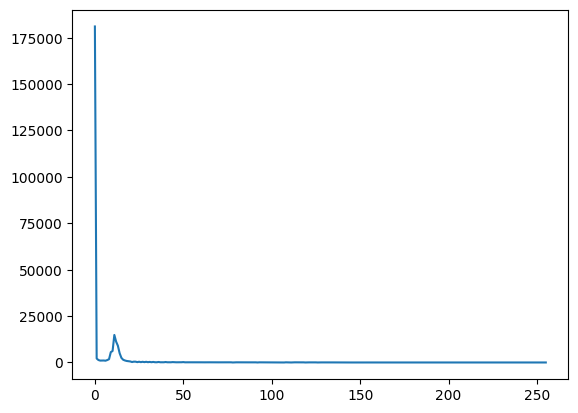

In [14]:
histogram_of_Power_law= cv2.calcHist([gamma_corrected], [0], None, [256], [0, 256])
plt.plot(histogram_of_Power_law)
plt.show()

In [41]:
import numpy as np
import cv2 
 
# Apply Canny edge detection
# resized=cv2.resize(img,(200,200))
# Apply Canny edge detection

edges = cv2.Canny(gamma_corrected, 70, 200)
edges_resized = cv2.resize(edges, (450, 450))
edges_resized = cv2.cvtColor(edges_resized, cv2.COLOR_GRAY2BGR) 

# Resize the original image to match the size of the edge-detected image
resized = cv2.resize(img, (450, 450))

# Stack the original and edge-detected images horizontally
hstack = np.hstack((resized, edges_resized))

# Display the result
cv2.imshow('Stacked Images', hstack)

# Wait until a key is pressed and close the image windows
cv2.waitKey(0)
cv2.destroyAllWindows()

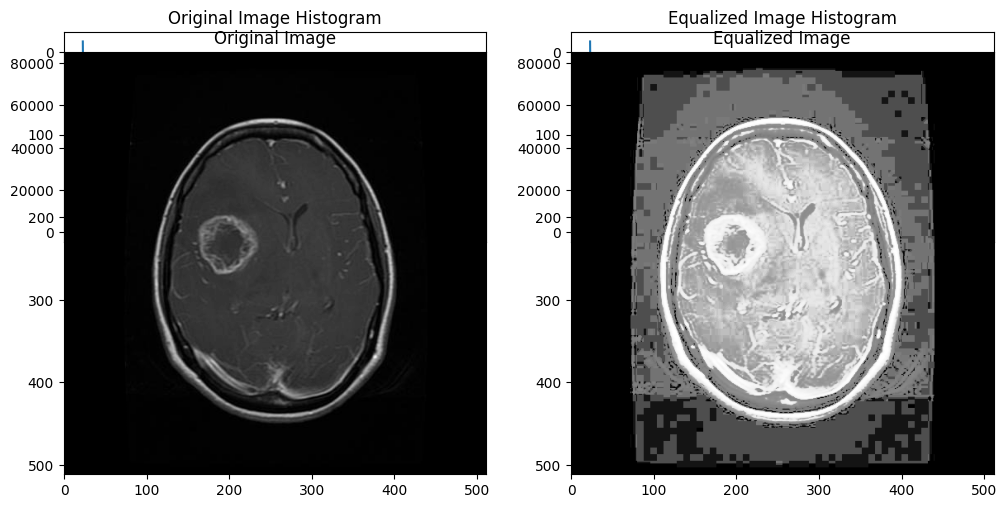

In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Original Image Histogram')
plt.plot(hist_original)

plt.subplot(2, 2, 2)
plt.title('Equalized Image Histogram')
plt.plot(hist_equalized)

# Step 3: Display the original and equalized images side by side
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import cv2

# Step 1: Read the grayscale image
image = cv2.imread('gamma_corrected_image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Initialize ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Step 4: Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Step 5: Display the image with keypoints
cv2.imshow('Image with Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
import cv2

# Step 1: Read the grayscale image

image = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Initialize ORB detector with a higher nfeatures parameter
orb = cv2.ORB_create(nfeatures=10)  # Adjust the value as needed

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Step 4: Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 5: Display the image with keypoints
cv2.imshow('Image with Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


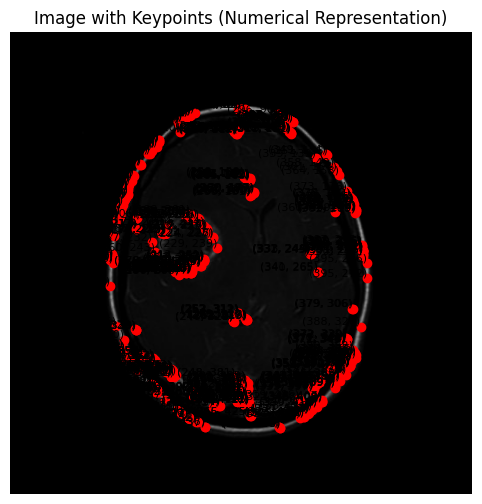

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the grayscale image
image = cv2.imread('gamma_corrected_image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Initialize ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Step 4: Convert the image to RGB format (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Step 5: Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)

# Step 6: Plot keypoints with numerical representation
for kp in keypoints:
    x, y = kp.pt
    plt.plot(x, y, 'ro')  # Plot the keypoint as a red dot
    plt.text(x, y, f'({int(x)}, {int(y)})', fontsize=8, color='black', ha='right', va='bottom')  # Annotate the keypoint with its coordinates

# Step 7: Show plot
plt.title('Image with Keypoints (Numerical Representation)')
plt.axis('off')
plt.show()


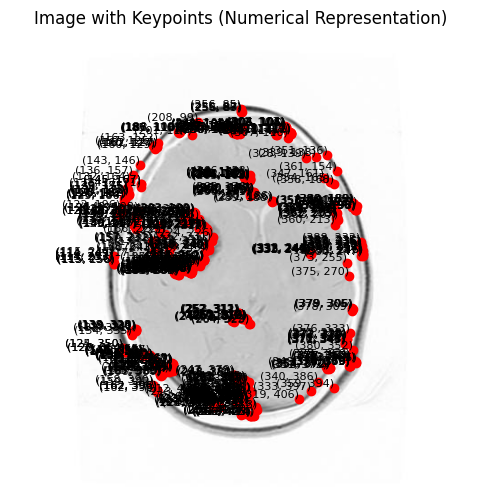

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the grayscale image
image = cv2.imread('negative_image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Initialize ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Step 4: Convert the image to RGB format (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Step 5: Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)

# Step 6: Plot keypoints with numerical representation
for kp in keypoints:
    x, y = kp.pt
    plt.plot(x, y, 'ro')  # Plot the keypoint as a red dot
    plt.text(x, y, f'({int(x)}, {int(y)})', fontsize=8, color='black', ha='right', va='bottom')  # Annotate the keypoint with its coordinates

# Step 7: Show plot
plt.title('Image with Keypoints (Numerical Representation)')
plt.axis('off')
plt.show()
